# Observations

Based on the the following bar charts, Capomulin and Ramicame were given about 75 more doses than the rest of the drug regimens.  When given the drug regimen Capomulin or Ramicame, they seem to produce smaller tumor volumes with their interquartile range between 40-30 mm3(and not outliers).  Based on the following scatter plots, as the mouse's weight increases so does the tumor volume (the tumor volume is increasing at 0.95mm3 per gram).   

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'outer')
# Display the data table for preview
mouse_study

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [2]:
# Checking the number of mice.
mice = len(mouse_study['Mouse ID'].value_counts())
mice

249

In [3]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()

In [4]:
 # Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = pd.DataFrame(dup_mouse)
dup_mouse_data

0
0  g989

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study[mouse_study['Mouse ID'].isin(dup_mouse)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
new_mouse_data = len(clean_df['Mouse ID'].value_counts())
new_mouse_data

248

# Summary Statistics 

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_reg_mean = clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
drug_reg_median = clean_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
drug_reg_var = clean_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
drug_reg_std = clean_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
drug_reg_sem = clean_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({'Mean': drug_reg_mean, 
                              'Median': drug_reg_median, 
                              'Variance': drug_reg_var,
                              'Standard Deviation':  drug_reg_std,
                              'SEM': drug_reg_sem})
# Display summary
summary_df


Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

In [8]:
 # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugs_groupby = clean_df.groupby('Drug Regimen')

# Using the aggregation method, produce the same summary statistics in a single line
summary_df_2 = drugs_groupby.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]

# Display summary
summary_df_2


mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

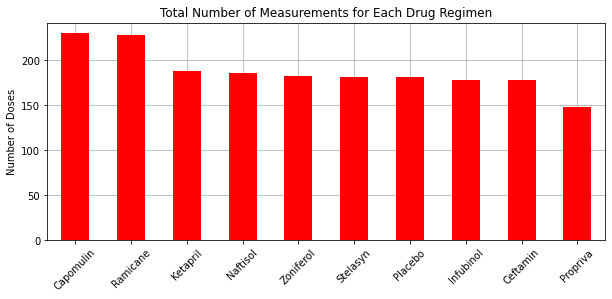

In [9]:
# # Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# For each Drug Regimen
drugs_pd = clean_df['Drug Regimen'].value_counts()

# Bar chart using pandas (color, title, size)
drugs_pd.plot(kind="bar", figsize=(10,4), title="Total Number of Measurements for Each Drug Regimen", color = 'red', zorder=3)

# Label y axis and rotate x axis.  Clean up graph
plt.xticks(rotation=45)
plt.ylabel('Number of Doses')

# Display gride using zorder
plt.grid(zorder=0)

# Show bar chart
plt.show()

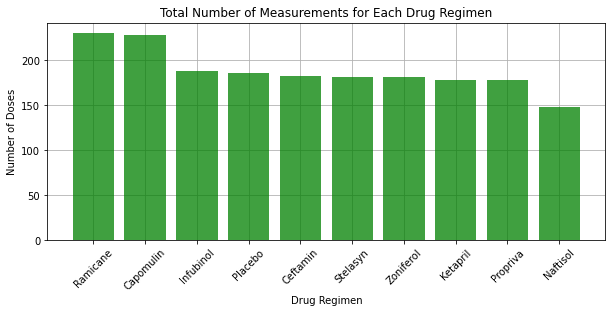

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Calculate x and y axis
counts = clean_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(counts))

# Create bar chart using pyplot
plt.figure(figsize=(10,4))
plt.bar(x_axis, counts, color='g', alpha=0.75, align='edge', zorder=3)

# Label x_axis ticks and clean up
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, clean_df['Drug Regimen'].unique(), rotation= 45)

# Labels for title and axes
plt.title('Total Number of Measurements for Each Drug Regimen')
plt.ylabel('Number of Doses')
plt.xlabel('Drug Regimen')

# Display grid using zorder
plt.grid(zorder=0)

# Show bar chart
plt.show()


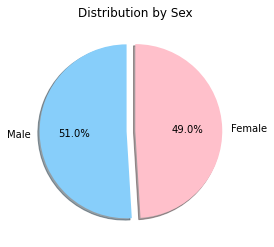

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Count values of data based on sex
gender_data = clean_df['Sex'].value_counts()

# Set colors, labels and explode
colors = ["lightskyblue", "pink"]
explode = (0.1, 0)

# Create pie chart using pandas kind='pie'. Clean up pie chart appearance
gender_data.plot(kind='pie', title= 'Distribution by Sex', labels = gender_data.index.values,explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

# Eliminate default y label
plt.ylabel('')

# Show pie chart
plt.show()

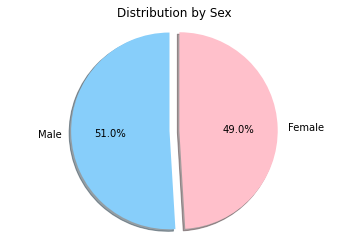

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count values of data based on sex
gender_data = clean_df['Sex'].value_counts()

# Set colors and explode
colors = ["lightskyblue", "pink"]
explode = (0.1, 0)

# Create pie chart using plt.pie.  Clean up pie chart appearance
plt.pie(gender_data,explode=explode, labels = gender_data.index.values, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

# Label title and center axis
plt.axis('equal')
plt.title('Distribution by Sex')

# Show pie chart
plt.show()

# Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})
max_timepoint

# Merge max timepoint and clean_df
merged_df = pd.merge(clean_df, max_timepoint, on='Mouse ID')
merged_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  Max Timepoint  
0           45.000000                 0             45  
1           38.825898                 0             45  
2           35.014271                 1             45  
3           34.223992                 1             45  
4           32.997729                 1             45

In [14]:
# Put treatments into a list for for loop (and later for plot labels)

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_val = []

for drug in drugs:
    
    drug_df = merged_df.loc[merged_df['Drug Regimen']==drug,:]
    final_timepoint = drug_df.loc[drug_df['Timepoint']==drug_df['Max Timepoint']]

# Create empty list to fill with tumor vol data (for plotting)
    tumor_values = final_timepoint['Tumor Volume (mm3)']
    drug_val.append(tumor_values)

# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    quartiles = tumor_values.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    print(f"The IQR of tumor volume for {drug} : {iqr}")
      
# Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    
#Count the number of outliers
    outlier_count =  tumor_values.loc[(final_timepoint['Tumor Volume (mm3)']>= upper_bound) | (final_timepoint['Tumor Volume (mm3)'] <= lower_bound)].count()
    print(f'For {drug} number of outliers: {outlier_count}')
    print(f'----------------------------------------------')

The IQR of tumor volume for Capomulin : 7.781863460000004
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.
For Capomulin number of outliers: 0
----------------------------------------------
The IQR of tumor volume for Ramicane : 9.098536719999998
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.
For Ramicane number of outliers: 0
----------------------------------------------
The IQR of tumor volume for Infubinol : 11.477135160000003
Values below 36.83290494999999 for Infubinol could be outliers.
Values above 82.74144559000001 for Infubinol could be outliers.
For Infubinol number of outliers: 1
----------------------------------------------
The IQR of tumor volume for Ceftamin : 15.577752179999997
Values below 25.355449580000002 for Ceftamin could be outliers.
Values above 87.66645829999999 for Ceftamin could be outliers.
For Ceftamin number of

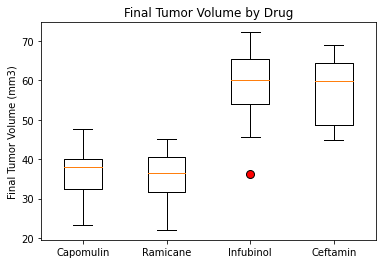

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Highlight any potential outliers in the plot by changing their color and style. 
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')
plt.boxplot(drug_val, flierprops=flierprops)


# Label axes and title 
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

# Display box plot
plt.show()

# Line and Scatter Plots

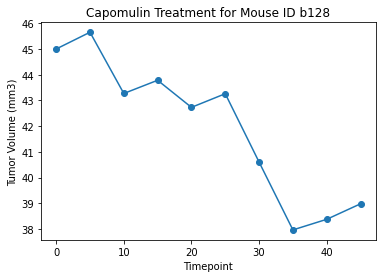

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = clean_df.loc[clean_df['Mouse ID']== 'b128']

# Plot line plot x = timepoint and y = tumor volume
plt.plot(cap_mouse['Timepoint'], cap_mouse['Tumor Volume (mm3)'], marker = 'o')

# Create x and y labels. Create title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment for Mouse ID b128')

# Display line plot
plt.show()

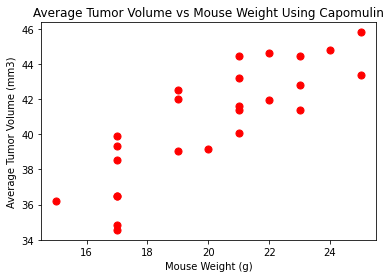

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_reg = clean_df.loc[clean_df['Drug Regimen']== 'Capomulin']

# Find mean of Tumor Volume and groupby Mouse ID.  Reset the index and rename column
avg_tumor_vol = pd.DataFrame(cap_reg.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)':'avg_tumor_vol'})

# Drop duplicates
avg_tumor_vol = pd.merge(cap_reg, avg_tumor_vol, on = 'Mouse ID')
avg_tumor_vol_scat = avg_tumor_vol[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()

# Set x and y axis.  Create scatter plot. 
x_axis = avg_tumor_vol_scat['Weight (g)']
y_axis = avg_tumor_vol_scat['avg_tumor_vol']
plt.scatter(x_axis, y_axis, s=50, color = 'red')

# Label axes and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs Mouse Weight Using Capomulin')

# Display scatter plot
plt.show()

In [18]:
# Calculate the correlation coefficient between tumor volume and mouse weight
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(sts.pearsonr(x_axis, y_axis)[0],2)}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


# Correlation and Regression

The r-squared is: 0.7088568047708717


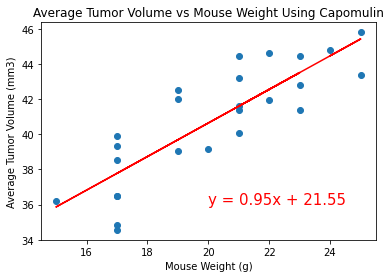

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cap_reg = clean_df.loc[clean_df['Drug Regimen']== 'Capomulin']

# Find mean of Tumor Volume and groupby Mouse ID.  Reset the index and rename column
avg_tumor_vol = pd.DataFrame(cap_reg.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)':'avg_tumor_vol'})

# Drop duplicates
avg_tumor_vol = pd.merge(cap_reg, avg_tumor_vol, on = 'Mouse ID')
avg_tumor_vol_scat = avg_tumor_vol[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()

# Set x and y axis.  
x_values = avg_tumor_vol_scat['Weight (g)']
y_values = avg_tumor_vol_scat['avg_tumor_vol']

# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with line equation.  Annotate line of equation
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

# Title, x label and y label
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs Mouse Weight Using Capomulin')


print(f"The r-squared is: {rvalue**2}")

# Display scatter plot with equation and line
plt.show()